# Anaysing the churning dataset to find information about their impact on custommer churning

# Reading dataset

In [ ]:
# import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
from sklearn import neighbors
from sklearn import svm

os.chdir("C:\\Users\\Vaibhav\\Desktop\\Task")
#reading dataset
dataset = pd.read_csv("Churn.csv")

#load
dataset.shape

#make a copy of original data
df=dataset
df.head()

# Dropping column
Customer ID is unimportant so we can drop it

In [76]:
#dropping cutomer ID column
df=df.drop(['customerID'],axis=1)



# 

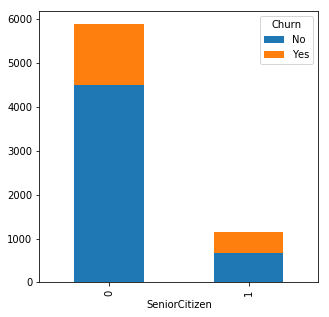

In [77]:
df.groupby(["SeniorCitizen","Churn"]).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))

whether the customer is a senior citizen or not majorly affects the Churn rate so we must keep this field

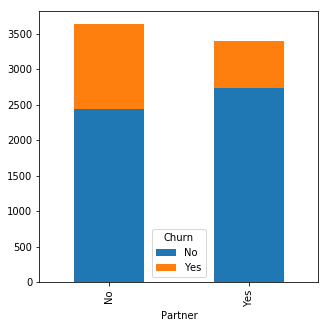

In [78]:
df.groupby(["Partner","Churn"]).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))


Not really helping in deciding Churn rate so we can exclude this data

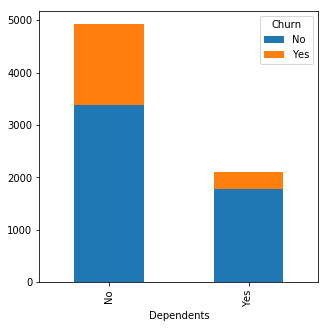

In [79]:
df.groupby(["Dependents","Churn"]).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))
#df=df.drop(['Dependents'],axis=1)

#as dropping this field is causing slight decrease in predictive accuracy of the model
#so we have to keep it

# Significance of 'tenure'

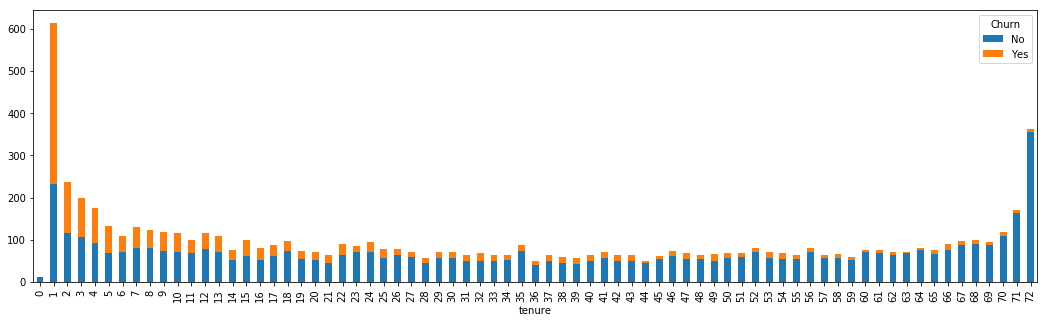

In [80]:
df.groupby(["tenure","Churn"]).size().unstack().plot(kind='bar',stacked=True,figsize=(18,5))

As the tenure of subscription increases, the churn rate is decreasing
This field is providing helpful information in determining 

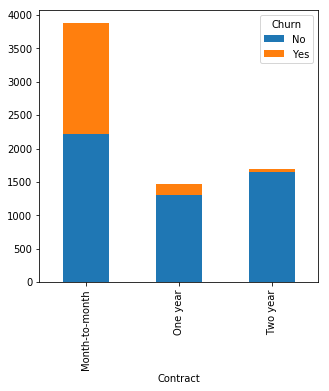

In [81]:
df.groupby(["Contract","Churn"]).size().unstack().plot(kind='bar',stacked=True,figsize=(5,5))

Must be included

In [82]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
#filling missing values with mean of TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

df['Churn'].dtype

dtype('O')

In [83]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X)
print(y)

[['Female' 0 'Yes' ... 'Electronic check' 29.85 29.85]
 ['Male' 0 'No' ... 'Mailed check' 56.95 1889.5]
 ['Male' 0 'No' ... 'Mailed check' 53.85 108.15]
 ...
 ['Female' 0 'Yes' ... 'Electronic check' 29.6 346.45]
 ['Male' 1 'Yes' ... 'Mailed check' 74.4 306.6]
 ['Male' 0 'No' ... 'Bank transfer (automatic)' 105.65 6844.5]]
['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [84]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
enY = LabelEncoder()
y = enY.fit_transform(y)

In [85]:
enX = LabelEncoder()
X[:,0] = enX.fit_transform(X[:,0])

X[:,1] = enX.fit_transform(X[:,1])

X[:,2] = enX.fit_transform(X[:,2])

X[:,3] = enX.fit_transform(X[:,3])

X[:,5] = enX.fit_transform(X[:,5])

X[:,6] = enX.fit_transform(X[:,6])

X[:,7] = enX.fit_transform(X[:,7])

X[:,8] = enX.fit_transform(X[:,8])

X[:,9] = enX.fit_transform(X[:,9])

X[:,10] = enX.fit_transform(X[:,10])

X[:,11] = enX.fit_transform(X[:,11])

X[:,12] = enX.fit_transform(X[:,12])

X[:,14] = enX.fit_transform(X[:,14])

X[:,13] = enX.fit_transform(X[:,13])

X[:,15] = enX.fit_transform(X[:,15])

X[:,16] = enX.fit_transform(X[:,16])

oneencX = OneHotEncoder(categorical_features=[6,7,8,9,10,11,12,13,14,16])
X = oneencX.fit_transform(X).toarray()

C:\Users\Vaibhav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Vaibhav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Splitting data in training and test data

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Applying Gradient Boosting Classifier

In [87]:
clf = ensemble.GradientBoostingClassifier(learning_rate=0.25, n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


# Building confusion matrix 

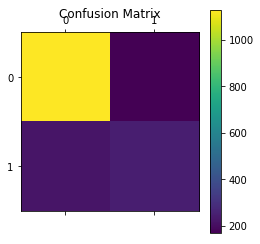

In [88]:
import pylab as pl
cm=metrics.confusion_matrix(y_test,y_pred)
pl.matshow(cm)
pl.title('Confusion Matrix')
pl.colorbar()
pl.show()


# Finding model's accuracy

In [89]:
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.7802385008517888


# Outcomes
As the model is specifiying that Long duration contracts are less vulnarable to churning 
So the Company must try to convice their customers to buy long term contracts

Moreover, they must target the younger section of the market because they are frequently changing
their plans according to their analysis.